In [1]:
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [17]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
train_data = pd.read_csv("data/train_data.csv")
train_data.shape

(14654, 5)

In [98]:
train_matrix = pd.pivot_table(train_data, values='quantity', 
                              index=['customer_id'], 
                              columns=['item_id'],
                             aggfunc=np.sum,
                             fill_value=0)   #change train from dataframe to matrix form
# row is customer, column is item and then the value is aggregated sum of quantity
train_matrix.shape

(4889, 3365)

In [6]:
item_stats = train_data.groupby("item_id").agg({"quantity": [np.size, np.mean]})

{'boxes': [<matplotlib.lines.Line2D at 0x118ee0850>],
 'caps': [<matplotlib.lines.Line2D at 0x118eeb690>,
 'fliers': [<matplotlib.lines.Line2D at 0x118ef5990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x118ef5350>],
 'whiskers': [<matplotlib.lines.Line2D at 0x118ee0950>,
  <matplotlib.lines.Line2D at 0x118eeb050>]}

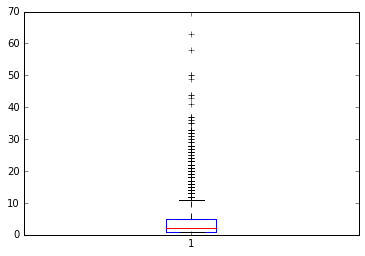

In [143]:
plt.boxplot(item_stats["quantity"]["size"])

In [142]:
np.unique(item_stats["quantity"]["size"], return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35,
        36, 37, 41, 43, 44, 49, 50, 58, 63]),
 array([1251,  630,  354,  251,  134,  115,   86,   65,   71,   63,   41,
          35,   35,   36,   25,   21,   18,   19,    6,   13,   16,    8,
           7,    5,    3,    7,    4,   10,    3,    3,    3,    5,    5,
           3,    2,    3,    1,    1,    2,    1,    2,    1,    1]))

In [159]:
item_stats_filterd = item_stats[item_stats["quantity"]["size"] > 19]
item_stats_filterd.index

Index([u'D1157345110800', u'D1350290020300', u'D1460046620651',
       u'D1525145390300', u'D1525145390500', u'D1525872350300',
       u'D1526345600001', u'D1529595320001', u'D1529595330500',
       u'D1529595330990',
       ...
       u'U1Y01891530500', u'U1Y02091560500', u'U1Y02091590500',
       u'U1Y02091590990', u'U1Y02091600990', u'U1Y04940590650',
       u'U1Y04940590800', u'U1Y05054860200', u'U1Y05054870100',
       u'U1Y06591470250'],
      dtype='object', name=u'item_id', length=109)

{'boxes': [<matplotlib.lines.Line2D at 0x131d58910>],
 'caps': [<matplotlib.lines.Line2D at 0x131da8790>,
 'fliers': [<matplotlib.lines.Line2D at 0x131db4a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x131db4450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x131d58a50>,
  <matplotlib.lines.Line2D at 0x131da8150>]}

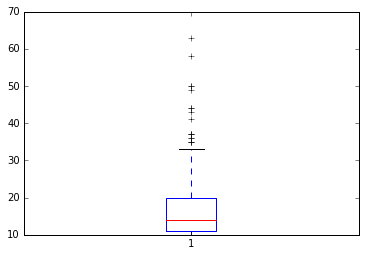

In [21]:
plt.boxplot(item_stats_filterd["quantity"]["size"])

In [11]:
user_stats = train_data.groupby("customer_id").agg({"quantity": [np.size, np.mean]})

In [28]:
np.unique(user_stats["quantity"]["size"], return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 40, 45, 46, 50, 62, 65, 74, 97]),
 array([2216, 1120,  521,  289,  172,  114,   93,   68,   55,   47,   26,
          19,   16,   20,    9,   13,    9,    3,   12,    7,    9,    5,
           4,    2,    3,    5,    4,    4,    4,    3,    2,    1,    1,
           1,    1,    1,    2,    1,    1,    1,    1,    1,    1,    1,
           1]))

In [29]:
user_stats_filterd = user_stats[user_stats["quantity"]["size"] > 9]

In [160]:
train_matrix_filterd = item_stats_filterd.join(train_matrix.T)
train_matrix_filterd.drop(train_matrix_filterd.columns[0], axis=1, inplace=True)
train_matrix_filterd.drop(train_matrix_filterd.columns[0], axis=1, inplace=True)
train_matrix_filterd = train_matrix_filterd.T
train_matrix_filterd.shape

(4889, 109)

In [161]:
train_matrix_filterd.to_csv("data/train_data_item20.csv")

In [155]:
train_matrix_1 = pd.read_csv("data/train_data_item20.csv", index_col=0)
train_matrix_1

,C5797400350019,D1000743420650,D1000745730250,D1000745780750,D1000745850001,D1000746080500,D1000746080700,D1000754080700,D1000754230650,D1001044360250,...,U1Y04940590650,U1Y04940590800,U1Y05040440200,U1Y05054860200,U1Y05054870100,U1Y06291410250,U1Y06291410500,U1Y06591470250,U1Y06591470700,U1Y08102210001
000001_KERRY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000001_TJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000002_SKP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000002_TFS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000002_TJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000002_WGM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000003_SKP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
000003_TFS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000004_KERRY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000004_LAP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
train_data_filterd.drop(train_data_filterd.columns[-1], axis=1, inplace=True)
train_data_filterd.drop(train_data_filterd.columns[-1], axis=1, inplace=True)

In [78]:
train_data_filterd.to_csv("data/train_data_item10.csv", index=False)

In [86]:
train_data_filterd.shape

(6956, 5)

In [89]:
train_matrix_filterd = pd.pivot_table(train_data_filterd, values='quantity', 
                              index=['customer_id'], 
                              columns=['item_id'],
                             aggfunc=np.sum,
                             fill_value=0)   #change train from dataframe to matrix form

train_matrix_filterd.shape
test_data = pd.read_csv("data/test_data.csv")
test_matrix = pd.pivot_table(test_data, values="quantity", index=["customer_id"], columns=["item_id"], aggfunc=np.sum, fill_value=0)

In [127]:
item_not_in = []
for item in test_matrix.columns:
    if item not in train_matrix_filterd.columns:
        item_not_in.append(item)
len(item_not_in)

423

In [129]:
test_matrix_filterd = test_matrix.drop(item_not_in, axis=1)

In [132]:
R_t = test_matrix_filterd.values
test_nonzero_index = np.nonzero(R_t)
len(test_nonzero_index[0])

286

In [134]:
test_matrix.shape

(437, 578)

In [135]:
customer_id_index_in_train = []
item_id_index_in_train = []
for i in xrange(len(test_nonzero_index[0])):
    customer_id_index_in_train.append(np.where(train_matrix_filterd.index == test_matrix_filterd.index[test_nonzero_index[0][i]])[0][0])
    item_id_index_in_train.append(np.where(train_matrix.columns == test_matrix_filterd.columns[test_nonzero_index[1][i]])[0][0])

In [137]:
len(item_id_index_in_train)

286

In [49]:
item_not_in = []
for item in train_matrix.columns:
    if item not in item_stats_filterd.index:
        item_not_in.append(item)
len(item_not_in)
train_matrix.drop(item_not_in, axis=1, inplace=True)

In [60]:
np.savetxt("data/R_item10.csv", R, delimiter=",")

In [51]:
train = train_matrix.values   # change from pandas dataframe to numpy ndarray
np.count_nonzero(train)

6695

In [52]:
P = np.zeros((4889, 408))   # P is the preference matrix

In [53]:
R = train    # keep the naming coordinate with paper "cf for implicit feedback"

In [54]:
P[train > 0] = 1
np.count_nonzero(P)     # p_ui values are derived by binarizaing the r_ui values

6695

In [55]:
alpha = 40
C = np.ones((4889, 408))     # C matrix is the confidence matrix 
C += alpha * R   # c_ui = 1 + alpha * r_ui

In [56]:
np.unique(C, return_counts=True)    # return the unique value in C and count also

(array([   1.,   41.,   81.,  121.]),
 array([1988017,    6442,     245,       8]))

In [57]:
X = np.random.uniform(0, 1, size=(4889, 3)) # initialize latent factors bet
#ween 0 and 1, first we let the dimension of latent factors to be 3
Y = np.random.uniform(0, 1, size=(408, 3)) 

In [12]:
C_u = np.zeros((3365, 408))   # construct the diagonal matrix
for index in xrange(408): 
    C_u[index][index] = C[9][index]
np.unique(C_u, return_counts=True)

(array([  0.,   1.,  41.]), array([11319860,     3356,        9]))

In [13]:
I_u = np.zeros((3365, 3365))   # identity matrix
np.fill_diagonal(I_u, 1)

In [14]:
np.unique(C_u - I_u, return_counts=True)

(array([  0.,  40.]), array([11323216,        9]))

In [15]:
Y_T_times_Y = np.dot(Y.transpose(), Y)
Y_T_times_Y.shape

(3, 3)

In [16]:
I_3 = np.zeros((3, 3))
np.fill_diagonal(I_3, 1)

In [17]:
from numpy.linalg import inv
first_part = inv(np.dot(np.dot(Y.transpose(), C_u - I_u), Y) + 2 * I_3)

In [18]:
second_part = np.dot(np.dot(Y.transpose(), C_u), P[9])

In [19]:
x_9 = np.dot(first_part, second_part)

In [20]:
x_9

array([ 0.56029361,  0.5916096 ,  1.06838685])

In [72]:
X[9]

array([ 0.4011029 ,  0.20649245,  0.83249256])

In [73]:
np.dot(x_9, Y[9])

1.0408194367112722

In [21]:
X[9] = x_9

In [22]:
X[9]

array([ 0.56029361,  0.5916096 ,  1.06838685])

In [27]:
np.dot(X, Y.transpose())[9][9]

1.8185309827621685

In [28]:
np.dot(X[9].transpose(), Y[9])

1.8185309827621685

In [33]:
P[:,0].shape

(4889,)

In [35]:
np.power(X, 2)

array([[ 0.1499916 ,  0.88185053,  0.95358553],
       [ 0.17831645,  0.06503   ,  0.01558804],
       [ 0.01165189,  0.80102577,  0.44786766],
       ..., 
       [ 0.20566497,  0.81565136,  0.49844689],
       [ 0.03514966,  0.24249871,  0.70672438],
       [ 0.03740752,  0.02938357,  0.0729263 ]])

In [12]:
np.savetxt("data/X.csv", X, delimiter=",")   # save the computed X to file to keep the current round result

In [13]:
X_c = np.loadtxt("data/X.csv", delimiter=",")

In [14]:
X_c.shape

(4889, 3)

In [15]:
X_c == X

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       ..., 
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

In [16]:
np.unique(X_c == X)

array([ True], dtype=bool)